# Section7 クラスタリング

## k-means

k-means
- sklearn.cluster.Kmeans
    1. KMeans(n_clusters)でインスタンスを生成
        - n_clusters引数にはクラスタの数を指定
    2. .fit(X)で学習（クラスタリング実施）
    3. .predict(X)で書くデータのクラスタリングの結果を参照
    4. .score(X)で損失を計算

In [1]:
import seaborn as sns

In [2]:
# データ準備
df = sns.load_dataset('iris')

# 説明変数可視化
X = df.drop(columns=['species'])
# X.head()

# 標準化
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
# kmeans.fit(X_scaled)
# labels = kmeans.predict(X_scaled)
labels = kmeans.fit_predict(X_scaled)

In [3]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [4]:
df['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## k-meansの結果を描画
- データセット：　irisデータセット
- 事前に標準化
- 教師ラベルと3クラスとk=3のk-meansの結果を比較
- k(1〜9)と損失を描画

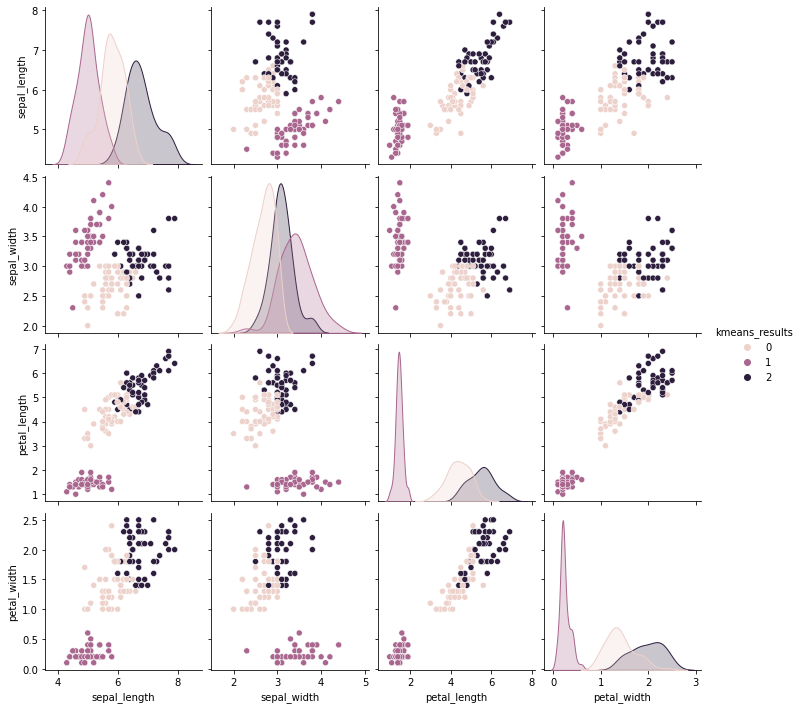

In [6]:
# kmeansのラベル結合
import pandas as pd
labels_df = pd.DataFrame(labels, columns=['kmeans_results'])
result_df = pd.concat([X, labels_df], axis=1)

# Kmeansのデータの分布を描画
sns.pairplot(result_df, hue='kmeans_results')

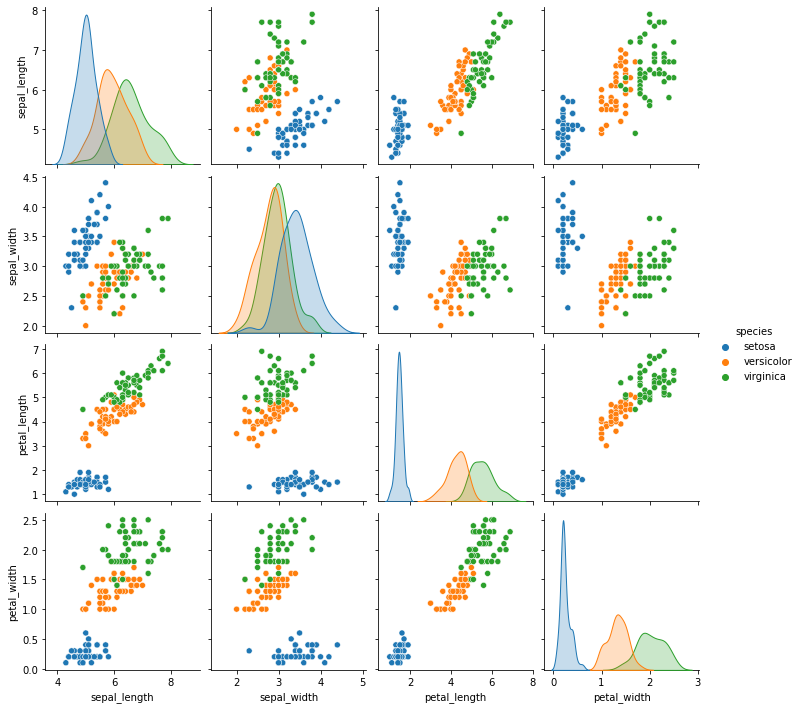

In [7]:
# 正解ラベルのデータの分布を描画
sns.pairplot(df, hue='species')

Text(0.5, 1.0, 'Cluster K vs loss')

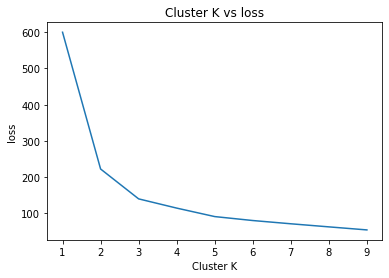

In [8]:
# クラスタ数k vs 損失関数loss

losses = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    losses.append(-kmeans.score(X_scaled))
    
import matplotlib.pyplot as plt
plt.plot(range(1, 10), losses)
plt.xlabel('Cluster K')
plt.ylabel('loss')
plt.title('Cluster K vs loss')

In [9]:
losses

[599.9999999999999,
 222.36170496502294,
 139.82049635974968,
 114.35407164049772,
 90.92751382392044,
 80.02218752722621,
 71.03343108154415,
 62.51430580335555,
 54.097864623562415]

## 階層クラスタリング

階層クラスタリング
- scipy.cluster.hierarchy.linkage
    - linkage(X, method)でクラスタリング実施
        - method引数には'single', 'average', 'complete', 'centroid', ''ward等を指定
    - dendrogramを構成する情報をNumpy Arayで返す
        - [クラスタ1のindex, クラスタ2のindex, 距離, データ数]
        - index>データ数：　linkageの戻り値のindex

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled,method='ward')

In [17]:
# idx1, idy1, d(距離), n(サンプル数)
Z[0]

array([101., 142.,   0.,   2.])

In [18]:
len(X_scaled)

150

In [22]:
# indexが101のデータと142のデータは同じデータが入っている。
# そのため、同じクラスタになる
print(X_scaled[101])
print(X_scaled[142])

[-0.05250608 -0.82256978  0.76275827  0.92230284]
[-0.05250608 -0.82256978  0.76275827  0.92230284]


In [24]:
# Z[13]はindex40と154の融合
Z[13]

array([ 40.        , 154.        ,   0.17221655,   3.        ])

In [28]:
# len(X_scaled)=150なので、X_scaled[154]は存在しない
# そのため、X_scaled[154]を書くのではなく、Z[154 -　len(X_scaled)]と書いて抜き出す
# Z[154 -　len(X_scaled)]は、index0と17のクラスタであることがわかった
# つまり、Z[13]は、index40とindex0,17の3つのクラスタになる
print(X_scaled[40])
print(Z[154-len(X_scaled)])
print(X_scaled[0])
print(X_scaled[17])

[-1.02184904  1.01900435 -1.39706395 -1.18381211]
[ 0.         17.          0.13163218  2.        ]
[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
[-0.90068117  1.01900435 -1.34022653 -1.18381211]


## dendrogram

dendrogram
- scypy.cluster.hierarchy.dendrogram
    - dendrogram(Z)でdendrogramを描画
    - Zにはlinkageの戻り値を入れる
    - truncate_mode引数およびp引数で任意の高さでdendrogramを切る
        - truncate_mode='lastp', p=クラスタ数：　指定したp個のクラスタになるようにdendrogramを切る
        - truncate_mode='level', p=段数：　p段になるようにdendrogramを切る

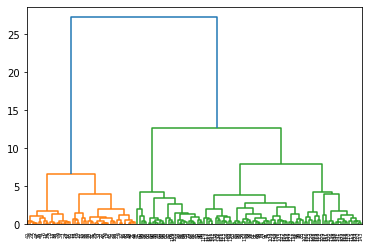

In [32]:
d = dendrogram(Z)

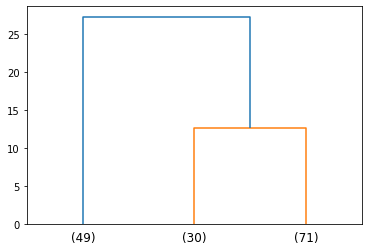

In [35]:
# truncate_modeとｐを指定することで任意のクラスタを指定することができる
# truncate_mode='lastp', p=3　で3つのクラスタにわける,pはクラスタ数の引数
d = dendrogram(Z, truncate_mode='lastp', p=3)

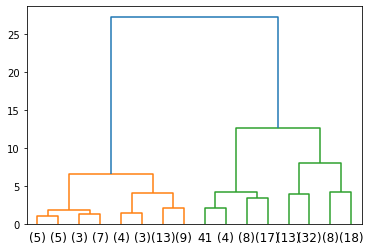

In [38]:
# truncate_mode='level', p=3とすることでクラスタの引数の段数までのdendrogramを作る
d = dendrogram(Z, truncate_mode='level', p=3)

## 階層クラスタリングの描画

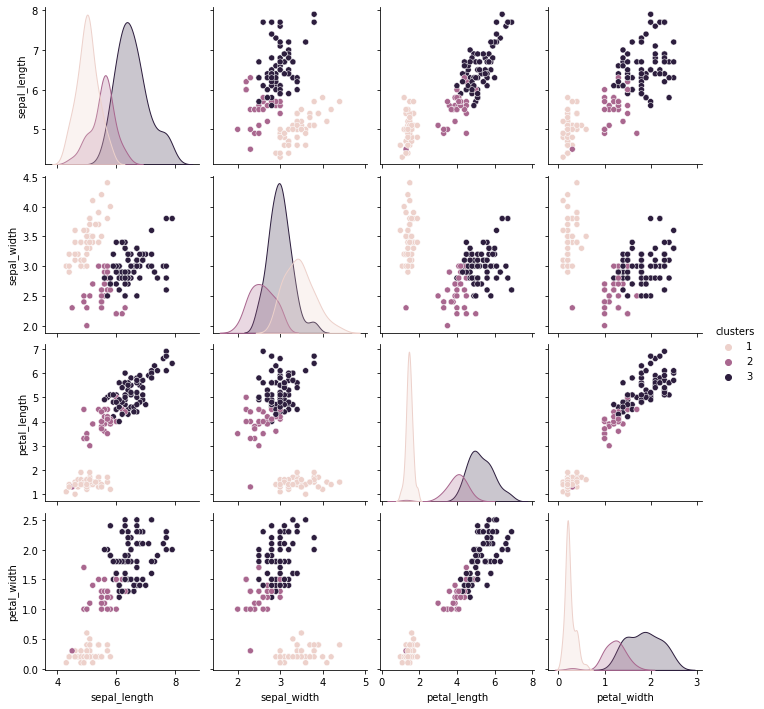

In [53]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, criterion='maxclust', t=3)

# Xとクラスタラベルの結合
clusters_df = pd.DataFrame({'clusters': clusters}) 
hc_result_df = pd.concat([X, clusters_df], axis=1)

# 描画
sns.pairplot(hc_result_df, hue='clusters')

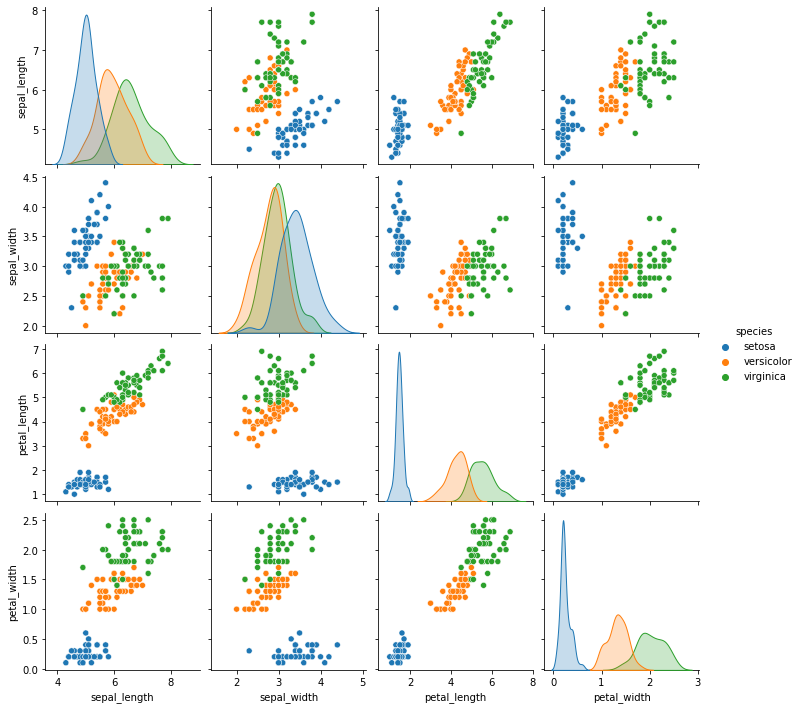

In [54]:
sns.pairplot(df, hue='species')